In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc, recall_score, f1_score
import time
from sklearn.model_selection import GridSearchCV

df = pd.read_csv('dengueSintomas.csv')
df.head()

,id_paciente,fecha_inicio_fiebre,dias_con_fiebre,temperatura_actual,globulos_blancos,dolor_cabeza_severo,dolor_detras_ojos,dolor_articular_muscular,sabor_metalico_boca,perdida_apetito,dolor_abdominal,nauseas_vomitos,diarrea,hemoglobina,hematocrito,plaquetas,dengue
0,P001,13-Jan,10.0,100.0,5.0,yes,no,no,yes,yes,yes,no,yes,15.0,21,140,yes
1,P002,13-Feb,4.0,104.0,1.0,no,yes,yes,no,no,no,no,no,9.0,22,80,no
2,P003,9-Jan,5.0,104.0,4.3,yes,no,no,yes,yes,yes,yes,no,9.3,24,120,yes
3,P004,12-Aug,12.0,101.0,1.8,yes,yes,no,no,no,no,no,no,11.2,25,50,no
4,P005,12-Oct,3.0,101.0,3.2,yes,no,no,no,no,no,yes,no,13.6,22,95,no


In [80]:
# Obtener información sobre las columnas y sus tipos de datos
df.info()

# Verificar la cantidad de valores nulos
df.isnull().sum()

# Ver estadísticas descriptivas
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1820 entries, 0 to 1819
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id_paciente               1820 non-null   object 
 1   fecha_inicio_fiebre       1820 non-null   object 
 2   dias_con_fiebre           1820 non-null   float64
 3   temperatura_actual        1820 non-null   float64
 4   globulos_blancos          1820 non-null   float64
 5   dolor_cabeza_severo       1820 non-null   object 
 6   dolor_detras_ojos         1820 non-null   object 
 7   dolor_articular_muscular  1820 non-null   object 
 8   sabor_metalico_boca       1820 non-null   object 
 9   perdida_apetito           1820 non-null   object 
 10  dolor_abdominal           1820 non-null   object 
 11  nauseas_vomitos           1820 non-null   object 
 12  diarrea                   1820 non-null   object 
 13  hemoglobina               1820 non-null   float64
 14  hematocr

,dias_con_fiebre,temperatura_actual,globulos_blancos,hemoglobina,hematocrito,plaquetas
count,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000
mean,6.432967,103.087912,3.025000,13.351786,32.080769,96.276374
std,3.601724,21.860645,1.272635,3.142119,7.385822,33.702430
min,1.000000,99.000000,1.000000,7.600000,18.000000,35.000000
25%,4.000000,102.000000,2.100000,10.600000,26.000000,74.000000
50%,6.000000,103.000000,2.950000,13.400000,32.000000,95.000000
75%,8.000000,104.000000,4.000000,15.900000,38.000000,120.000000
max,21.000000,1033.000000,24.000000,19.800000,47.000000,875.000000


In [81]:
# Convertir la columna de fecha en formato datetime
df['fecha_inicio_fiebre'] = pd.to_datetime(df['fecha_inicio_fiebre'], format='%d-%b')

# Convertir las columnas con valores binarios a tipo 'category'
columnas_categoricas = [
    'dolor_cabeza_severo', 'dolor_detras_ojos', 'dolor_articular_muscular', 
    'sabor_metalico_boca', 'perdida_apetito', 'dolor_abdominal', 
    'nauseas_vomitos', 'diarrea', 'dengue'
]

df[columnas_categoricas] = df[columnas_categoricas].astype('category')

df['dias_con_fiebre'] = df['dias_con_fiebre'].astype('int')

df.info()  
df.describe()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1820 entries, 0 to 1819
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id_paciente               1820 non-null   object        
 1   fecha_inicio_fiebre       1820 non-null   datetime64[ns]
 2   dias_con_fiebre           1820 non-null   int64         
 3   temperatura_actual        1820 non-null   float64       
 4   globulos_blancos          1820 non-null   float64       
 5   dolor_cabeza_severo       1820 non-null   category      
 6   dolor_detras_ojos         1820 non-null   category      
 7   dolor_articular_muscular  1820 non-null   category      
 8   sabor_metalico_boca       1820 non-null   category      
 9   perdida_apetito           1820 non-null   category      
 10  dolor_abdominal           1820 non-null   category      
 11  nauseas_vomitos           1820 non-null   category      
 12  diarrea             

,id_paciente,fecha_inicio_fiebre,dias_con_fiebre,temperatura_actual,globulos_blancos,dolor_cabeza_severo,dolor_detras_ojos,dolor_articular_muscular,sabor_metalico_boca,perdida_apetito,dolor_abdominal,nauseas_vomitos,diarrea,hemoglobina,hematocrito,plaquetas,dengue
0,P001,1900-01-13,10,100.0,5.0,yes,no,no,yes,yes,yes,no,yes,15.0,21,140,yes
1,P002,1900-02-13,4,104.0,1.0,no,yes,yes,no,no,no,no,no,9.0,22,80,no
2,P003,1900-01-09,5,104.0,4.3,yes,no,no,yes,yes,yes,yes,no,9.3,24,120,yes
3,P004,1900-08-12,12,101.0,1.8,yes,yes,no,no,no,no,no,no,11.2,25,50,no
4,P005,1900-10-12,3,101.0,3.2,yes,no,no,no,no,no,yes,no,13.6,22,95,no


# CONVERTIR COLUMNAS DE SINTOMAS A 1 Y 0

In [82]:
# Lista de columnas que contienen respuestas tipo "yes"/"no"
columnas_binarias = [
    'dolor_cabeza_severo',
    'dolor_detras_ojos',
    'dolor_articular_muscular',
    'sabor_metalico_boca',
    'perdida_apetito',
    'dolor_abdominal',
    'nauseas_vomitos',
    'diarrea',
    'dengue'
]

# Convertimos los valores: 'yes' -> 1 y 'no' -> 0
df[columnas_binarias] = df[columnas_binarias].replace({'yes': 1, 'no': 0})

# Verificamos los primeros registros de estas columnas para asegurarnos que la conversión fue correcta
df.head()

C:\Users\angel\AppData\Local\Temp\ipykernel_15440\3397136504.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columnas_binarias] = df[columnas_binarias].replace({'yes': 1, 'no': 0})
C:\Users\angel\AppData\Local\Temp\ipykernel_15440\3397136504.py:15: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df[columnas_binarias] = df[columnas_binarias].replace({'yes': 1, 'no': 0})
C:\Users\angel\AppData\Local\Temp\ipykernel_15440\3397136504.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To 

,id_paciente,fecha_inicio_fiebre,dias_con_fiebre,temperatura_actual,globulos_blancos,dolor_cabeza_severo,dolor_detras_ojos,dolor_articular_muscular,sabor_metalico_boca,perdida_apetito,dolor_abdominal,nauseas_vomitos,diarrea,hemoglobina,hematocrito,plaquetas,dengue
0,P001,1900-01-13,10,100.0,5.0,1,0,0,1,1,1,0,1,15.0,21,140,1
1,P002,1900-02-13,4,104.0,1.0,0,1,1,0,0,0,0,0,9.0,22,80,0
2,P003,1900-01-09,5,104.0,4.3,1,0,0,1,1,1,1,0,9.3,24,120,1
3,P004,1900-08-12,12,101.0,1.8,1,1,0,0,0,0,0,0,11.2,25,50,0
4,P005,1900-10-12,3,101.0,3.2,1,0,0,0,0,0,1,0,13.6,22,95,0


# TRATAMIENTO DE OUTLIERS

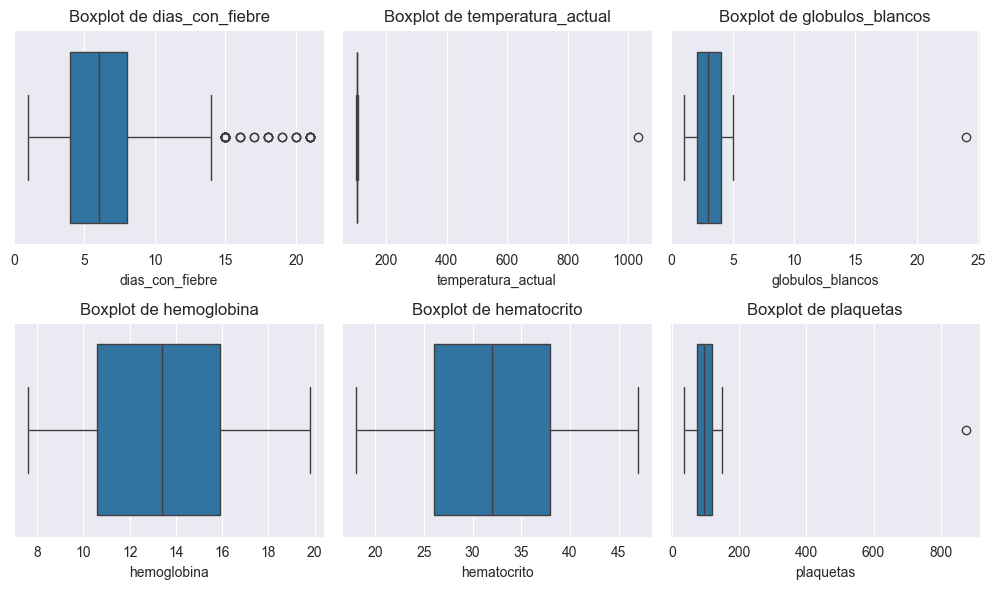

In [83]:
# Visualización de Outliers: Boxplots antes del tratamiento

# Columnas numéricas relevantes para el análisis
columnas_numericas = ['dias_con_fiebre', 'temperatura_actual', 'globulos_blancos', 
                      'hemoglobina', 'hematocrito', 'plaquetas']

# Crear un gráfico de caja (boxplot) para cada una de las columnas numéricas
plt.figure(figsize=(10, 6))
for i, columna in enumerate(columnas_numericas, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[columna])
    plt.title(f'Boxplot de {columna}')
    
plt.tight_layout()
plt.show()


In [84]:
# Imputar valores atípicos con la mediana
for columna in columnas_numericas:
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    df[columna] = np.where(df[columna] < limite_inferior, df[columna].median(), df[columna])
    df[columna] = np.where(df[columna] > limite_superior, df[columna].median(), df[columna])


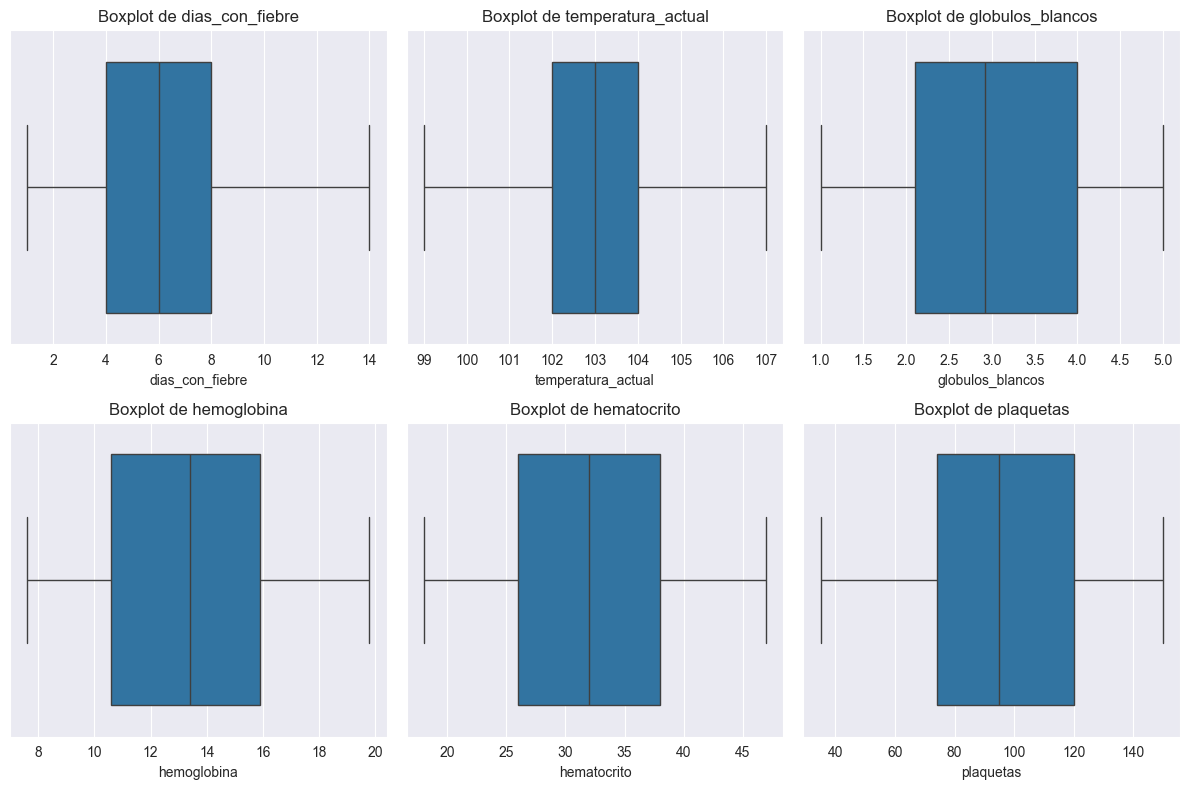

In [85]:
# Visualización de Outliers: Boxplots después del tratamiento

plt.figure(figsize=(12, 8))
for i, columna in enumerate(columnas_numericas, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[columna])
    plt.title(f'Boxplot de {columna}')
    
plt.tight_layout()
plt.show()


Distribución de la variable 'dolor_cabeza_severo':
dolor_cabeza_severo
1    1658
0     162
Name: count, dtype: int64
--------------------------------------------------
Distribución de la variable 'dolor_detras_ojos':
dolor_detras_ojos
0    1072
1     748
Name: count, dtype: int64
--------------------------------------------------
Distribución de la variable 'dolor_articular_muscular':
dolor_articular_muscular
0    1080
1     740
Name: count, dtype: int64
--------------------------------------------------
Distribución de la variable 'sabor_metalico_boca':
sabor_metalico_boca
0    1181
1     639
Name: count, dtype: int64
--------------------------------------------------
Distribución de la variable 'perdida_apetito':
perdida_apetito
0    1187
1     633
Name: count, dtype: int64
--------------------------------------------------
Distribución de la variable 'dolor_abdominal':
dolor_abdominal
0    984
1    836
Name: count, dtype: int64
--------------------------------------------------
Dist

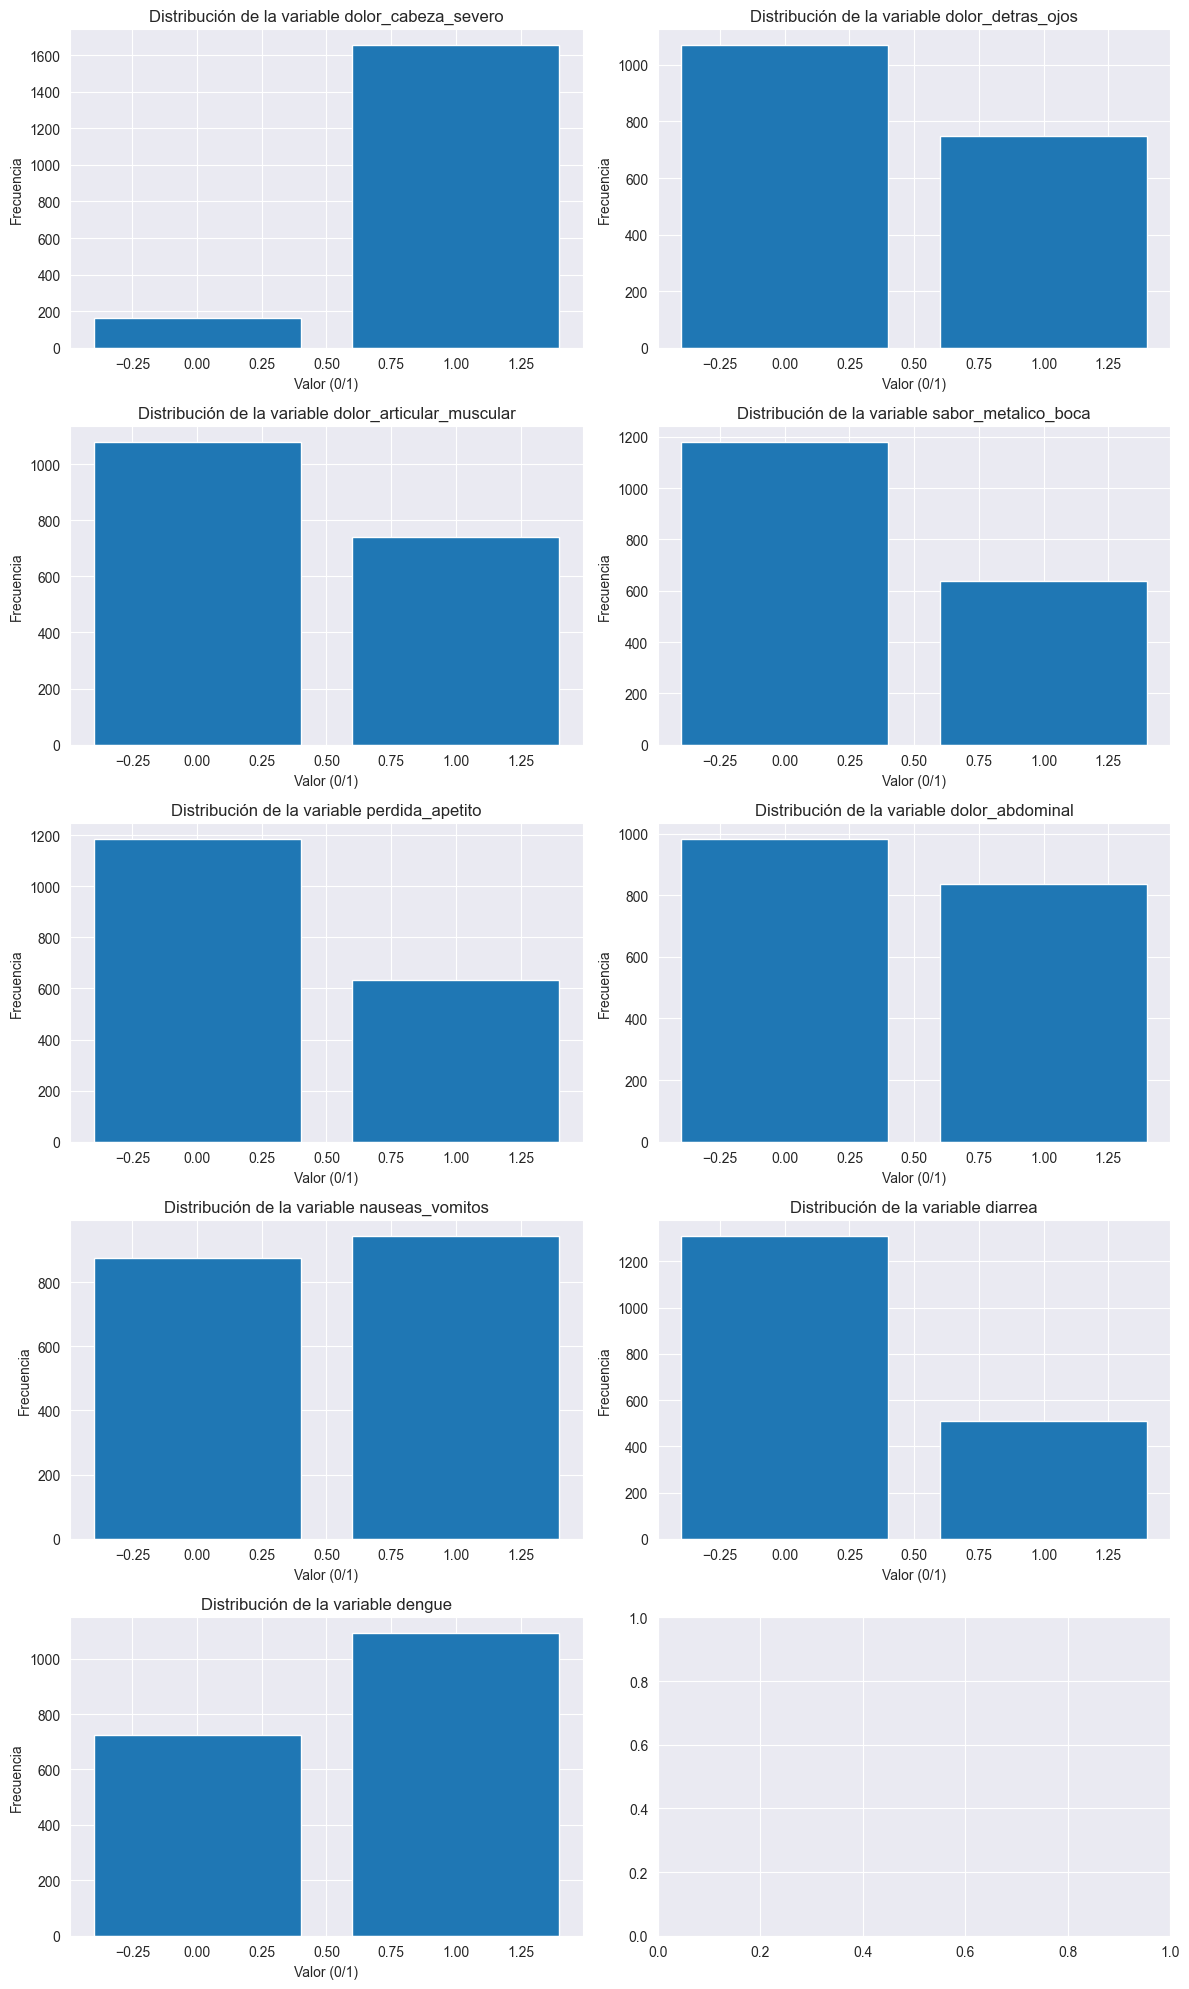

In [86]:
columnas = [
    'dolor_cabeza_severo', 'dolor_detras_ojos', 'dolor_articular_muscular',
    'sabor_metalico_boca', 'perdida_apetito', 'dolor_abdominal',
    'nauseas_vomitos', 'diarrea', 'dengue'
]

# Revisar la distribución de las clases (0/1) en cada columna
for col in columnas:
    print(f"Distribución de la variable '{col}':")
    print(df[col].value_counts())  # Cuenta la frecuencia de cada valor (0 y 1)
    print("-" * 50)

# Graficar la distribución de las clases para cada variable
num_cols = 2
num_rows = (len(columnas) + 1) // num_cols  # Redondear hacia arriba el número de filas

# Crear una figura con subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, num_rows * 4))

# Si hay un número impar de gráficos, hacer que el último subgráfico sea solo
axes = axes.flatten()

# Graficar la distribución de las clases en subgráficos
for i, col in enumerate(columnas):
    axes[i].bar(df[col].value_counts().index, df[col].value_counts().values)
    axes[i].set_title(f"Distribución de la variable {col}")
    axes[i].set_xlabel('Valor (0/1)')
    axes[i].set_ylabel('Frecuencia')

# Ajustar el layout para que no se superpongan los títulos
plt.tight_layout()
plt.show()

# MODELO SVM LINEAR



Resultados con Kernel: Lineal
Accuracy: 0.9753
AUC-ROC: 0.9917
Recall (Sensibilidad): 0.9631
Tiempo de predicción: 0.0017 segundos
Especificidad: 0.9932
Tasa de Falsos Positivos (FPR): 0.0068
F1-Score: 0.9789


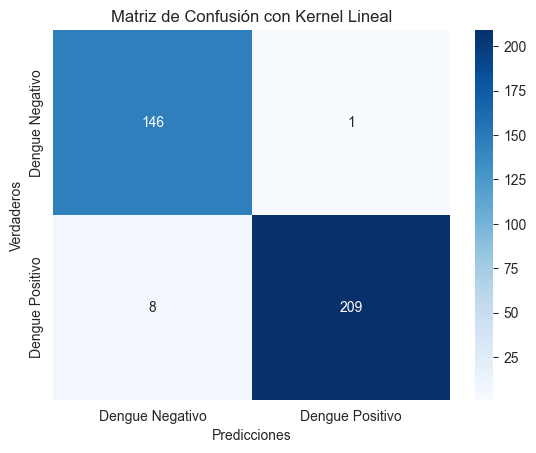

In [87]:
# Seleccionar las columnas numéricas
columnas_numericas = ['dias_con_fiebre']

# Seleccionar las columnas no numéricas
columnas_no_numericas = ['dolor_cabeza_severo', 'dolor_detras_ojos', 'dolor_articular_muscular',
                          'sabor_metalico_boca', 'perdida_apetito', 'dolor_abdominal',
                          'nauseas_vomitos', 'diarrea']

# Estandarización de las columnas numéricas
scaler = StandardScaler()
df[columnas_numericas] = scaler.fit_transform(df[columnas_numericas])  # Solo estandariza las columnas numéricas

# X contiene solo las variables seleccionadas
X = df[['dias_con_fiebre'] + columnas_no_numericas]
y = df['dengue']  # Variable objetivo: dengue

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM con Kernel lineal
svm_linear = SVC(kernel='linear', probability=True)

# Entrenar el modelo
svm_linear.fit(X_train, y_train)

# Hacer predicciones
y_pred_linear = svm_linear.predict(X_test)

# Evaluar el modelo
print("\n\nResultados con Kernel: Lineal")

# 1. Precisión (Accuracy)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f"Accuracy: {accuracy_linear:.4f}")

# 2. AUC-ROC
y_prob_linear = svm_linear.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva
fpr, tpr, thresholds = roc_curve(y_test, y_prob_linear)
roc_auc_linear = auc(fpr, tpr)
print(f"AUC-ROC: {roc_auc_linear:.4f}")

# 3. Sensibilidad (Recall)
recall_linear = recall_score(y_test, y_pred_linear)
print(f"Recall (Sensibilidad): {recall_linear:.4f}")

# 4. Tiempo de predicción
start_time = time.time()
y_pred_linear = svm_linear.predict(X_test)
end_time = time.time()
prediction_time_linear = end_time - start_time
print(f"Tiempo de predicción: {prediction_time_linear:.4f} segundos")

# 5. Especificidad (Specificity)
cm = confusion_matrix(y_test, y_pred_linear)
tn, fp, fn, tp = cm.ravel()
specificity_linear = tn / (tn + fp)
print(f"Especificidad: {specificity_linear:.4f}")

# 6. Tasa de Falsos Positivos (FPR)
fpr_linear = fp / (tn + fp)
print(f"Tasa de Falsos Positivos (FPR): {fpr_linear:.4f}")

# 7. F1-Score
f1_linear = f1_score(y_test, y_pred_linear)
print(f"F1-Score: {f1_linear:.4f}")

# Crear la matriz de confusión
cm_linear = confusion_matrix(y_test, y_pred_linear)

# Graficar la matriz de confusión
sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Blues', xticklabels=['Dengue Negativo', 'Dengue Positivo'], yticklabels=['Dengue Negativo', 'Dengue Positivo'])
plt.xlabel('Predicciones')
plt.ylabel('Verdaderos')
plt.title('Matriz de Confusión con Kernel Lineal')
plt.show()

# MODELO SVM POLINÓMICO



Resultados con Kernel: Polinómico
Accuracy: 0.9918
AUC-ROC: 0.9990
Recall (Sensibilidad): 1.0000
Tiempo de predicción: 0.0032 segundos
Especificidad: 0.9796
Tasa de Falsos Positivos (FPR): 0.0204
F1-Score: 0.9931


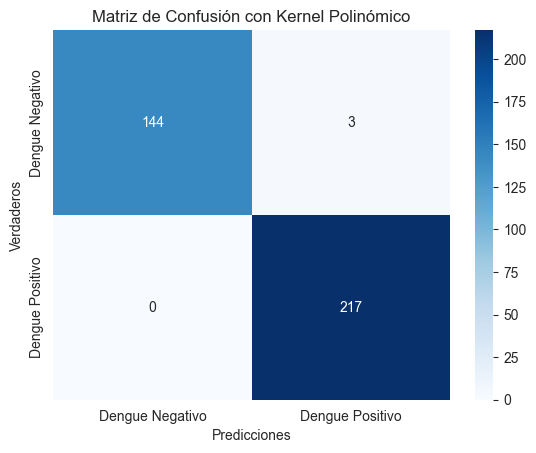

In [88]:
# Seleccionar las columnas numéricas
columnas_numericas = ['dias_con_fiebre']

# Seleccionar las columnas no numéricas
columnas_no_numericas = ['dolor_cabeza_severo', 'dolor_detras_ojos', 'dolor_articular_muscular',
                          'sabor_metalico_boca', 'perdida_apetito', 'dolor_abdominal',
                          'nauseas_vomitos', 'diarrea']

# Estandarización de las columnas numéricas
scaler = StandardScaler()
df[columnas_numericas] = scaler.fit_transform(df[columnas_numericas])  # Solo estandariza las columnas numéricas

# X contiene solo las variables seleccionadas
X = df[['dias_con_fiebre'] + columnas_no_numericas]
y = df['dengue']  # Variable objetivo: dengue

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM con Kernel Polinómico
svm_poly = SVC(kernel='poly', probability=True)

# Entrenar el modelo
svm_poly.fit(X_train, y_train)

# Hacer predicciones
y_pred_poly = svm_poly.predict(X_test)

# Evaluar el modelo
print("\n\nResultados con Kernel: Polinómico")

# 1. Precisión (Accuracy)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
print(f"Accuracy: {accuracy_poly:.4f}")

# 2. AUC-ROC
y_prob_poly = svm_poly.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva
fpr, tpr, thresholds = roc_curve(y_test, y_prob_poly)
roc_auc_poly = auc(fpr, tpr)
print(f"AUC-ROC: {roc_auc_poly:.4f}")

# 3. Sensibilidad (Recall)
recall_poly = recall_score(y_test, y_pred_poly)
print(f"Recall (Sensibilidad): {recall_poly:.4f}")

# 4. Tiempo de predicción
start_time = time.time()
y_pred_poly = svm_poly.predict(X_test)
end_time = time.time()
prediction_time_poly = end_time - start_time
print(f"Tiempo de predicción: {prediction_time_poly:.4f} segundos")

# 5. Especificidad (Specificity)
cm = confusion_matrix(y_test, y_pred_poly)
tn, fp, fn, tp = cm.ravel()
specificity_poly = tn / (tn + fp)
print(f"Especificidad: {specificity_poly:.4f}")

# 6. Tasa de Falsos Positivos (FPR)
fpr_poly = fp / (tn + fp)
print(f"Tasa de Falsos Positivos (FPR): {fpr_poly:.4f}")

# 7. F1-Score
f1_poly = f1_score(y_test, y_pred_poly)
print(f"F1-Score: {f1_poly:.4f}")

# Crear la matriz de confusión
cm_poly = confusion_matrix(y_test, y_pred_poly)

# Graficar la matriz de confusión
sns.heatmap(cm_poly, annot=True, fmt='d', cmap='Blues', xticklabels=['Dengue Negativo', 'Dengue Positivo'], yticklabels=['Dengue Negativo', 'Dengue Positivo'])
plt.xlabel('Predicciones')
plt.ylabel('Verdaderos')
plt.title('Matriz de Confusión con Kernel Polinómico')
plt.show()


# MODELO SVM RBF

Resultados con Kernel: RBF
Accuracy: 0.9780
AUC-ROC: 0.9991
Recall (Sensibilidad): 0.9724
Tiempo de predicción: 0.0058 segundos
Especificidad: 0.9864
Tasa de Falsos Positivos (FPR): 0.0136
F1-Score: 0.9814


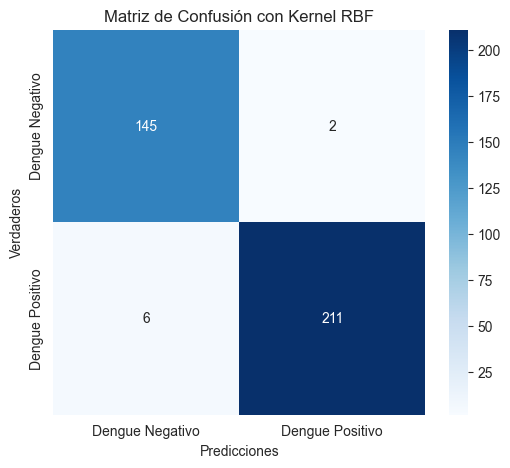

In [89]:
# Seleccionar las columnas numéricas
columnas_numericas = ['dias_con_fiebre']

# Seleccionar las columnas no numéricas
columnas_no_numericas = ['dolor_cabeza_severo', 'dolor_detras_ojos', 'dolor_articular_muscular',
                          'sabor_metalico_boca', 'perdida_apetito', 'dolor_abdominal',
                          'nauseas_vomitos', 'diarrea']

# Estandarización de las columnas numéricas
scaler = StandardScaler()
df[columnas_numericas] = scaler.fit_transform(df[columnas_numericas])  # Solo estandariza las columnas numéricas

# X contiene solo las variables seleccionadas
X = df[['dias_con_fiebre'] + columnas_no_numericas]
y = df['dengue']  # Variable objetivo: dengue

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM con Kernel RBF
svm_rbf = SVC(kernel='rbf', probability=True)

# Entrenar el modelo
svm_rbf.fit(X_train, y_train)

# Hacer predicciones
y_pred_rbf = svm_rbf.predict(X_test)

# Evaluar el modelo
print("Resultados con Kernel: RBF")

# 1. Precisión (Accuracy)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"Accuracy: {accuracy_rbf:.4f}")

# 2. AUC-ROC
y_prob_rbf = svm_rbf.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rbf)
roc_auc_rbf = auc(fpr, tpr)
print(f"AUC-ROC: {roc_auc_rbf:.4f}")

# 3. Sensibilidad (Recall)
recall_rbf = recall_score(y_test, y_pred_rbf)
print(f"Recall (Sensibilidad): {recall_rbf:.4f}")

# 4. Tiempo de predicción
start_time = time.time()
y_pred_rbf = svm_rbf.predict(X_test)
end_time = time.time()
prediction_time_rbf = end_time - start_time
print(f"Tiempo de predicción: {prediction_time_rbf:.4f} segundos")

# 5. Especificidad (Specificity)
cm_rbf = confusion_matrix(y_test, y_pred_rbf)
tn, fp, fn, tp = cm_rbf.ravel()
specificity_rbf = tn / (tn + fp)
print(f"Especificidad: {specificity_rbf:.4f}")

# 6. Tasa de Falsos Positivos (FPR)
fpr_rbf = fp / (tn + fp)
print(f"Tasa de Falsos Positivos (FPR): {fpr_rbf:.4f}")

# 7. F1-Score
f1_rbf = f1_score(y_test, y_pred_rbf)
print(f"F1-Score: {f1_rbf:.4f}")

# Crear la matriz de confusión
cm_rbf = confusion_matrix(y_test, y_pred_rbf)

# Graficar la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rbf, annot=True, fmt='d', cmap='Blues', xticklabels=['Dengue Negativo', 'Dengue Positivo'], yticklabels=['Dengue Negativo', 'Dengue Positivo'])
plt.xlabel('Predicciones')
plt.ylabel('Verdaderos')
plt.title('Matriz de Confusión con Kernel RBF')
plt.show()



# MODELO SVM SIGMOIDE



Resultados con Kernel: Sigmoide
Accuracy: 0.7665
AUC-ROC: 0.8591
Recall (Sensibilidad): 0.8203
Tiempo de predicción: 0.0057 segundos
Especificidad: 0.6871
Tasa de Falsos Positivos (FPR): 0.3129
F1-Score: 0.8073


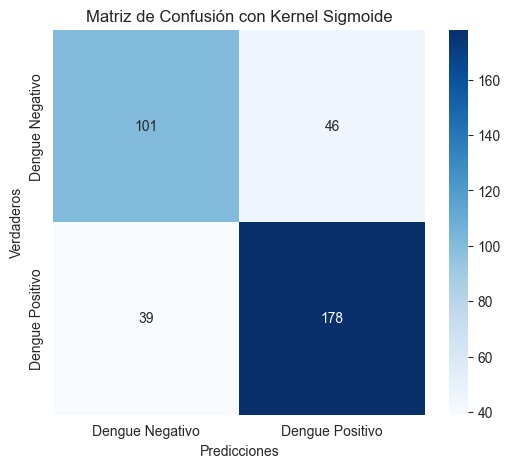

In [90]:
# Seleccionar las columnas numéricas
columnas_numericas = ['dias_con_fiebre']

# Seleccionar las columnas no numéricas
columnas_no_numericas = ['dolor_cabeza_severo', 'dolor_detras_ojos', 'dolor_articular_muscular',
                          'sabor_metalico_boca', 'perdida_apetito', 'dolor_abdominal',
                          'nauseas_vomitos', 'diarrea']

# Estandarización de las columnas numéricas
scaler = StandardScaler()
df[columnas_numericas] = scaler.fit_transform(df[columnas_numericas])  # Solo estandariza las columnas numéricas

# X contiene solo las variables seleccionadas
X = df[['dias_con_fiebre'] + columnas_no_numericas]
y = df['dengue']  # Variable objetivo: dengue

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM con Kernel Sigmoide
svm_sigmoid = SVC(kernel='sigmoid', probability=True)

# Entrenar el modelo
svm_sigmoid.fit(X_train, y_train)

# Hacer predicciones
y_pred_sigmoid = svm_sigmoid.predict(X_test)

# Evaluar el modelo
print("\n\nResultados con Kernel: Sigmoide")

# 1. Precisión (Accuracy)
accuracy_sigmoid = accuracy_score(y_test, y_pred_sigmoid)
print(f"Accuracy: {accuracy_sigmoid:.4f}")

# 2. AUC-ROC
y_prob_sigmoid = svm_sigmoid.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva
fpr, tpr, thresholds = roc_curve(y_test, y_prob_sigmoid)
roc_auc_sigmoid = auc(fpr, tpr)
print(f"AUC-ROC: {roc_auc_sigmoid:.4f}")

# 3. Sensibilidad (Recall)
recall_sigmoid = recall_score(y_test, y_pred_sigmoid)
print(f"Recall (Sensibilidad): {recall_sigmoid:.4f}")

# 4. Tiempo de predicción
start_time = time.time()
y_pred_sigmoid = svm_sigmoid.predict(X_test)
end_time = time.time()
prediction_time_sigmoid = end_time - start_time
print(f"Tiempo de predicción: {prediction_time_sigmoid:.4f} segundos")

# 5. Especificidad (Specificity)
cm_sigmoid = confusion_matrix(y_test, y_pred_sigmoid)
tn, fp, fn, tp = cm_sigmoid.ravel()
specificity_sigmoid = tn / (tn + fp)
print(f"Especificidad: {specificity_sigmoid:.4f}")

# 6. Tasa de Falsos Positivos (FPR)
fpr_sigmoid = fp / (tn + fp)
print(f"Tasa de Falsos Positivos (FPR): {fpr_sigmoid:.4f}")

# 7. F1-Score
f1_sigmoid = f1_score(y_test, y_pred_sigmoid)
print(f"F1-Score: {f1_sigmoid:.4f}")

# Crear la matriz de confusión
cm_sigmoid = confusion_matrix(y_test, y_pred_sigmoid)

# Graficar la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(cm_sigmoid, annot=True, fmt='d', cmap='Blues', xticklabels=['Dengue Negativo', 'Dengue Positivo'], yticklabels=['Dengue Negativo', 'Dengue Positivo'])
plt.xlabel('Predicciones')
plt.ylabel('Verdaderos')
plt.title('Matriz de Confusión con Kernel Sigmoide')
plt.show()

In [91]:
def convertir_riesgo(prob):
    if prob < 0.3:
        return 'bajo'
    elif prob < 0.7:
        return 'medio'
    else:
        return 'alto'

# Convertir las probabilidades en categorías de riesgo para cada modelo
riesgo_linear = [convertir_riesgo(p) for p in y_prob_linear]
riesgo_poly = [convertir_riesgo(p) for p in y_prob_poly]
riesgo_rbf = [convertir_riesgo(p) for p in y_prob_rbf]
riesgo_sigmoid = [convertir_riesgo(p) for p in y_prob_sigmoid]

In [92]:
import joblib
# Guardar el modelo con kernel lineal
joblib.dump(svm_linear, 'modelo_svm_lineal_ajustado.pkl')
# Guardar el modelo con kernel polinómico
joblib.dump(svm_poly, 'modelo_svm_poli_ajustado.pkl')
# Guardar el modelo con kernel RBF
joblib.dump(svm_rbf, 'modelo_svm_rbf_ajustado.pkl')
# Guardar el modelo con kernel sigmoide
joblib.dump(svm_sigmoid, 'modelo_svm_sigmoide_ajustado.pkl')

['modelo_svm_sigmoide_ajustado.pkl']